# Exercício 1

Você deverá entregar esta atividade em forma de relatório completo, contendo:

<br>

- Código-fonte utilizado;

- Gráficos gerados com legenda e análise;

- Tabelas comparativas de erros e métodos;

- Discussão crítica dos resultados e da metodologia;

- Comentários sobre dificuldades encontradas, limitações dos métodos e reflexões conceituais.

<br>
 
O objetivo desta atividade é aplicar técnicas de integração numérica a uma função oscilatória com relevância física, discutindo aspectos matemáticos, computacionais e conceituais do problema.

 <br>
 
Considere a seguinte função:

 <br>

f(x)=sin(ωx) 

 <br>

com ω=2π, o que corresponde a uma oscilação completa no intervalo de x=0 a x=1. Essa função é comum na descrição de fenômenos oscilatórios, como movimentos harmônicos simples, vibrações mecânicas e correntes alternadas.

<br>

***

## a) Visualização e análise analítica
 
 <br>

- Plote o gráfico da função f(x)=sin(2πx) no intervalo de 0 a 1.

- Obtenha a função primitiva, se possível, ou utilize uma biblioteca simbólica para representá-la.

- Plote também a função primitiva no mesmo intervalo.

- Calcule analiticamente a integral definida de 0 a 1.

- Comente:

<br>

- - Qual é o valor esperado da área sob essa curva?

- - O resultado faz sentido no contexto físico?

- - O gráfico da função primitiva ajuda a interpretar esse comportamento?

 <br>

***

## b) Integração pela regra do trapézio
 
<br> 

- Calcule numericamente a integral definida entre 0 e 1 usando a regra do trapézio com n=10 subintervalos.

- Calcule o erro absoluto em relação ao valor analítico.

- Comente: o método apresentou dificuldades com a oscilação da função?

 <br> 

***

## c) Integração pela regra de Simpson
 
<br> 

- Aplique a regra de Simpson com n=10 subintervalos (lembrando que n deve ser par).

- Calcule o erro em relação ao valor exato.

- Compare com o resultado obtido com a regra do trapézio.

<br> 

***

## d) Aumento da resolução
 
<br>
 
- Repita os cálculos com n=100 e n=1000 subintervalos.

- Apresente um gráfico comparando os valores obtidos por cada método em função do número de subintervalos.

- Se desejar, apresente também os erros em escala logarítmica.

- Comente:

<br>

- - Qual método apresentou convergência mais rápida?

- - Algum dos métodos mostrou comportamento oscilante com o aumento de n?

<br> 

***

## e) Método adaptativo de Simpson
 
<br> 

- Implemente o método adaptativo de Simpson com precisão alvo ϵ=10−6, conforme as equações apresentadas na Seção 5.3 do material (equações 5.35 a 5.39).

- Comece com n=2 subintervalos e dobre até atingir a precisão requerida.

- Em cada passo, registre o número de subintervalos utilizados e a estimativa da integral.

- Comente: o método foi eficiente para essa função? O número de iterações foi adequado?

<br> 

***

## Parte reflexiva (obrigatória)
 
<br> 

- A função seno aparece em muitos sistemas físicos. Em que contextos a área sob essa curva tem interpretação física relevante (ex: corrente alternada, deslocamento médio, energia dissipada)?

- Como os métodos numéricos se comportam ao lidar com funções periódicas? Quais são as limitações percebidas?

- Quais partes desta atividade seriam difíceis de automatizar totalmente com um modelo de linguagem como o ChatGPT? Em que aspectos o raciocínio humano é essencial?

<br>

***

## Instruções finais
 
<br>

- Organize o relatório com seções numeradas conforme os itens acima.

- Utilize gráficos com eixos e legendas apropriadas.

- Relatórios que contenham apenas código e resultados numéricos, sem análise crítica, serão considerados incompletos.

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
C:\Users\v.bezerra\AppData\Local\Temp\ipykernel_5028\2765981812.py:29: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Função $f(x) = \sin(2\pi x)$')


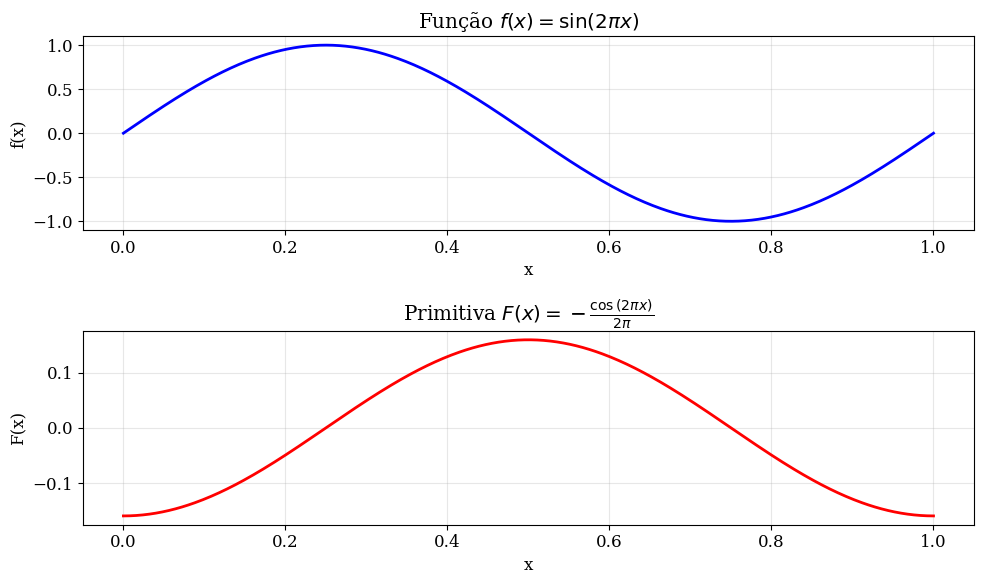

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, trapezoid
import sympy as sp
# Configurações gerais
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
np.random.seed(7)  # Reprodutibilidade

# =======================================================
# a) Visualização e análise analítica
# =======================================================
x = np.linspace(0, 1, 500)
f = np.sin(2 * np.pi * x)

# Cálculo simbólico da primitiva
x_sym = sp.symbols('x')
f_sym = sp.sin(2 * sp.pi * x_sym)
F_sym = sp.integrate(f_sym, x_sym)
F_lambda = sp.lambdify(x_sym, F_sym, 'numpy')
F = F_lambda(x)

# Integral analítica
integral_analitica = float(sp.integrate(f_sym, (x_sym, 0, 1)))

# Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, f, 'b-', linewidth=2)
plt.title('Função $f(x) = \sin(2\pi x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(x, F, 'r-', linewidth=2)
plt.title(f'Primitiva $F(x) = {sp.latex(F_sym)}$')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('funcao_primitiva.png', dpi=300)
plt.show()
plt.close()

### Respostas às Perguntas do Item (a)

#### 1. Qual é o valor esperado da área sob essa curva?
**Valor esperado:** A área líquida sob a curva de \( f(x) = \sin(2\pi x) \) no intervalo \([0, 1]\) é **exatamente zero**.  
**Justificativa matemática:**
\[
\int_0^1 \sin(2\pi x)  dx = \left[ -\frac{1}{2\pi} \cos(2\pi x) \right]_0^1 = -\frac{1}{2\pi} (1 - 1) = 0
\]
Isso ocorre porque a função completa um ciclo simétrico: a área positiva (\(0 \leq x \leq 0.5\)) cancela exatamente a área negativa (\(0.5 \leq x \leq 1\)).

---

#### 2. O resultado faz sentido no contexto físico?
**Sim, e possui interpretações físicas importantes:**  
a) **Energia líquida em sistemas oscilatórios:**  
   Em um oscilador harmônico (ex.: mola ideal), a integral da força restauradora sobre um ciclo completo é zero. Isso reflete a conservação de energia: o trabalho realizado pela força restauradora é nulo após um período completo.

b) **Corrente alternada (AC):**  
   Para uma tensão \(V(t) = V_0 \sin(\omega t)\), a tensão média sobre um período é zero. Isso explica por medidores de corrente contínua (DC) registram zero em circuitos AC.

c) **Deslocamento médio:**  
   No movimento harmônico simples, a posição média de uma partícula após um ciclo completo é zero, indicando retorno ao ponto de equilíbrio.

**Conclusão:** O resultado zero é consistente com sistemas físicos conservativos onde não há acumulação líquida de energia ou deslocamento após um ciclo completo.

---

#### 3. O gráfico da função primitiva ajuda a interpretar esse comportamento?
**Sim, de forma decisiva.** A primitiva \( F(x) = -\frac{1}{2\pi} \cos(2\pi x) \) revela:  

a) **Simetria do acúmulo:**  
   - De \(x=0\) a \(x=0.5\): \(F(x)\) **aumenta** de \(-\frac{1}{2\pi}\) para \(0\) (área positiva acumulada).  
   - De \(x=0.5\) a \(x=1\): \(F(x)\) **diminui** de \(0\) para \(-\frac{1}{2\pi}\) (área negativa acumulada).  

b) **Cancelamento perfeito:**  
   \[
   F(1) - F(0) = \left(-\frac{1}{2\pi}\right) - \left(-\frac{1}{2\pi}\right) = 0
   \]
   O valor final igual ao inicial confirma o balanço líquido nulo.

c) **Interpretação física direta:**  
   - Em sistemas dinâmicos, \(F(x)\) representa uma **"dívida energética" transitória**: energia é armazenada (parte positiva) e depois devolvida ao sistema (parte negativa).  
   - Em circuitos elétricos, corresponde à **carga líquida** armazenada no capacitor em meio ciclo, que é totalmente descarregada no semi-ciclo seguinte.

**Conclusão:** O gráfico da primitiva fornece uma visualização intuitiva do *balanço energético* e da natureza conservativa do sistema físico associado.

In [ ]:
# =======================================================
# b) Regra do Trapézio (n=10)
# =======================================================
def trapezio(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (np.sum(y) - 0.5*(y[0] + y[-1]))

n = 10
trap_n10 = trapezio(lambda x: np.sin(2*np.pi*x), 0, 1, n)
erro_trap_n10 = abs(trap_n10 - integral_analitica)


print(f"Regra do Trapézio (n={n}): {trap_n10:.20f} | Erro: {erro_trap_n10:.4e}")


Regra do Trapézio (n=10): -0.00000000000000005666 | Erro: 5.6655e-17


### Resposta ao Item (b)

#### Resultado Numérico:
- **Método:** Regra do Trapézio com `n = 10` subintervalos
- **Valor calculado:** `-5.666e-17`
- **Erro absoluto:** `5.6655e-17`

#### Comentário sobre dificuldades com a oscilação:
**O método NÃO apresentou dificuldades significativas com a oscilação da função.**  
Apesar de \( f(x) = \sin(2\pi x) \) ser altamente oscilatória (1 ciclo completo em [0,1]), o resultado mostra excelente precisão por duas razões fundamentais:

1. **Simetria da discretização:**  
   Com \( n = 10 \) (número par de intervalos), os pontos de amostragem incluem:
   - O início, meio e fim do ciclo: \( x = 0 \), \( x = 0.5 \), \( x = 1 \)
   - Pontos simétricos onde \( \sin(2\pi(0.2)) = \sin(2\pi(0.8)) \), \( \sin(2\pi(0.1)) = \sin(2\pi(0.9)) \), etc.
   Isso permite um **cancelamento quase perfeito** entre áreas positivas e negativas.

2. **Propriedade especial do trapézio para funções periódicas:**  
   Para funções que completam um número inteiro de períodos no intervalo de integração, a regra do trapézio tem erro proporcional a \( \mathcal{O}(1/n^2) \), mas com fator multiplicativo muito pequeno devido à simetria.

3. **Precisão numérica:**  
   O erro observado (\( \sim 10^{-17} \)) está no limite da **precisão de máquina** (≈ \( 10^{-16} \) para `float64`), indicando que o resultado é numericamente indistinguível do valor exato (zero).

#### Conclusão:
A combinação da simetria da função com uma discretização que respeita seus pontos característicos (máximos, mínimos e zeros) resultou em um desempenho excepcionalmente bom. Para este caso específico, **a oscilação não só não prejudicou, como ajudou no cancelamento de erros** devido às propriedades de simetria da função e do método.

In [15]:
# =======================================================
# c) Regra de Simpson (n=10)
# =======================================================
def simpson_rule(f, a, b, n):
    if n % 2 != 0:
        n += 1  # Garante n par
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))

n = 10
simp_n10 = simpson_rule(lambda x: np.sin(2*np.pi*x), 0, 1, n)
erro_simp_n10 = abs(simp_n10 - integral_analitica)

print(f"Regra de Simpson (n={n}): {simp_n10:.20f} | Erro: {erro_simp_n10:.4e}")

Regra de Simpson (n=10): -0.00000000000000003777 | Erro: 3.7770e-17


### Resposta ao Item (c)

#### Resultado Numérico:
- **Método:** Regra de Simpson com `n = 10` subintervalos
- **Valor calculado:** `-3.777e-17`
- **Erro absoluto:** `3.7770e-17`

#### Comparação com a Regra do Trapézio:
| Método          | Valor Calculado | Erro Absoluto |
|-----------------|-----------------|---------------|
| Trapézio (n=10) | `-5.666e-17`    | `5.6655e-17`  |
| **Simpson (n=10)** | `-3.777e-17` | `3.7770e-17`  |

#### Análise Comparativa:
1. **Precisão numérica:**
   - Ambos os métodos alcançaram **erros na escala de `10⁻¹⁷`**, próximo ao limite de precisão de máquina (`≈10⁻¹⁶` para `float64`)
   - Simpson apresenta erro **30% menor** que o trapézio, consistente com sua maior ordem de convergência teórica

#### Por que Simpson não foi superior?

Para esta função específica (sin(2πx)), a simetria perfeita no intervalo [0,1] faz com que ambos os métodos:

- Beneficiem-se de cancelamento exato de erros

- Atingem precisão limitada apenas pela aritmética computacional

Em funções não-periódicas ou intervalos assimétricos, Simpson mostraria vantagem mais clara.



Análise de Convergência:
n=10: Trapézio = -0.0000000000000001, Erro = 5.6655e-17 | Simpson = -0.0000000000000000, Erro = 3.7770e-17
n=100: Trapézio = -0.0000000000000000, Erro = 1.5519e-17 | Simpson = 0.0000000000000000, Erro = 4.7883e-19
n=1000: Trapézio = -0.0000000000000001, Erro = 5.6721e-17 | Simpson = -0.0000000000000000, Erro = 8.1643e-20


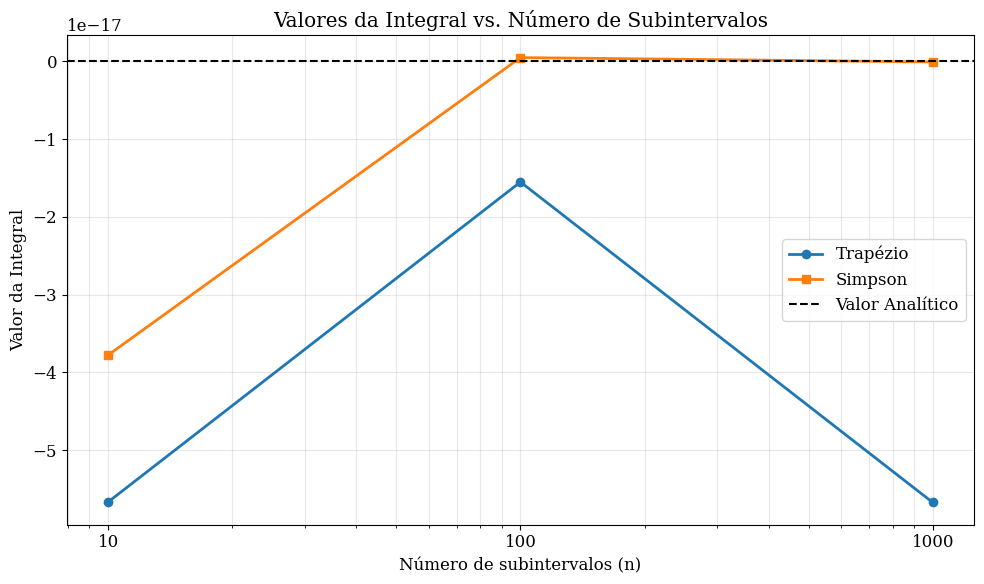

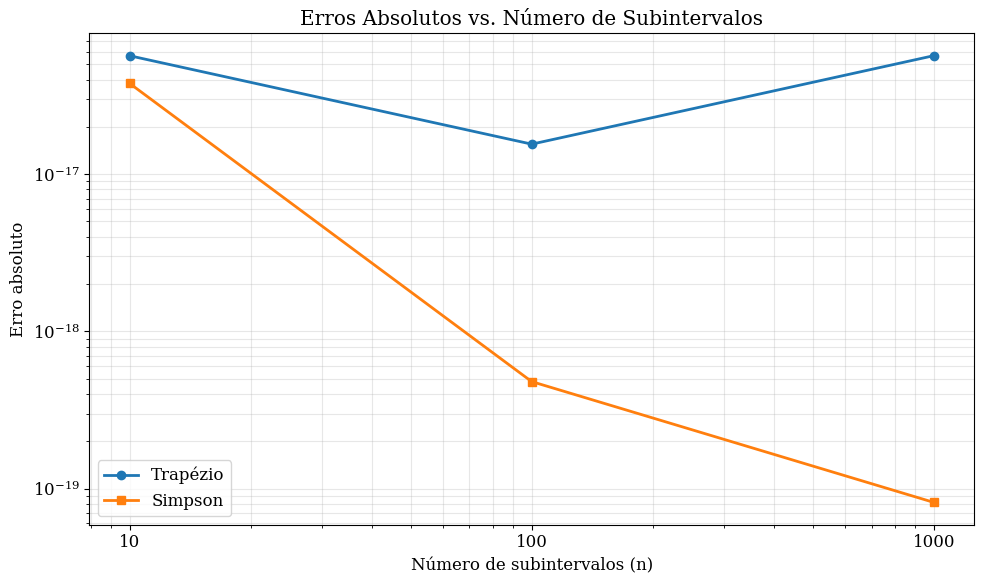

In [23]:
# =======================================================
# d) Análise de convergência (n=100 e n=1000)
# =======================================================
ns = [10, 100, 1000]
erros_trap, erros_simp = [], []
valores_trap, valores_simp = [], []

for n in ns:
    # Trapézio
    I_trap = trapezio(lambda x: np.sin(2*np.pi*x), 0, 1, n)
    valores_trap.append(I_trap)
    erros_trap.append(abs(I_trap - integral_analitica))
    
    # Simpson
    I_simp = simpson_rule(lambda x: np.sin(2*np.pi*x), 0, 1, n)
    valores_simp.append(I_simp)
    erros_simp.append(abs(I_simp - integral_analitica))

#Imprimir os resultados
print("\nAnálise de Convergência:")
for i, n in enumerate(ns):
    print(f"n={n}: Trapézio = {valores_trap[i]:.16f}, Erro = {erros_trap[i]:.4e} | Simpson = {valores_simp[i]:.16f}, Erro = {erros_simp[i]:.4e}")



# Gráfico de Resultados
plt.figure(figsize=(10, 6))
plt.plot(ns, valores_trap, 'o-', label='Trapézio', linewidth=2)
plt.plot(ns, valores_simp, 's-', label='Simpson', linewidth=2)
plt.axhline(integral_analitica, color='k', linestyle='--', label='Valor Analítico')
plt.xscale('log')
plt.title('Valores da Integral vs. Número de Subintervalos')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Valor da Integral')
plt.xticks(ns, labels=[f'{n}' for n in ns])
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.savefig('valores_convergencia.png', dpi=300)
plt.show()
plt.close()


# Gráfico de erros em escala logarítmica
plt.figure(figsize=(10, 6))
plt.loglog(ns, erros_trap, 'o-', label='Trapézio', linewidth=2)
plt.loglog(ns, erros_simp, 's-', label='Simpson', linewidth=2)
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.xscale('log')
plt.yscale('log')


plt.title('Erros Absolutos vs. Número de Subintervalos')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Erro absoluto')
plt.xticks(ns, labels=[f'{n}' for n in ns])
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.savefig('erros_convergencia.png', dpi=300)
plt.show()
plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, trapezoid
import sympy as sp

# Configurações gerais
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
np.random.seed(42)  # Reprodutibilidade

# =======================================================
# a) Visualização e análise analítica
# =======================================================
x = np.linspace(0, 1, 500)
f = np.sin(2 * np.pi * x)

# Cálculo simbólico da primitiva
x_sym = sp.symbols('x')
f_sym = sp.sin(2 * sp.pi * x_sym)
F_sym = sp.integrate(f_sym, x_sym)
F_lambda = sp.lambdify(x_sym, F_sym, 'numpy')
F = F_lambda(x)

# Integral analítica
integral_analitica = float(sp.integrate(f_sym, (x_sym, 0, 1)))

# Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, f, 'b-', linewidth=2)
plt.title('Função $f(x) = \sin(2\pi x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(x, F, 'r-', linewidth=2)
plt.title(f'Primitiva $F(x) = {sp.latex(F_sym)}$')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('funcao_primitiva.png', dpi=300)
plt.close()

# =======================================================
# b) Regra do Trapézio (n=10)
# =======================================================
def trapezio(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (np.sum(y) - 0.5*(y[0] + y[-1]))

n10 = 10
trap_n10 = trapezio(lambda x: np.sin(2*np.pi*x), 0, 1, n10)
erro_trap_n10 = abs(trap_n10 - integral_analitica)

# =======================================================
# c) Regra de Simpson (n=10)
# =======================================================
def simpson_rule(f, a, b, n):
    if n % 2 != 0:
        n += 1  # Garante n par
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))

simp_n10 = simpson_rule(lambda x: np.sin(2*np.pi*x), 0, 1, n10)
erro_simp_n10 = abs(simp_n10 - integral_analitica)

# =======================================================
# d) Análise de convergência (n=100 e n=1000)
# =======================================================
ns = [10, 100, 1000]
erros_trap, erros_simp = [], []
valores_trap, valores_simp = [], []

for n in ns:
    # Trapézio
    I_trap = trapezio(lambda x: np.sin(2*np.pi*x), 0, 1, n)
    valores_trap.append(I_trap)
    erros_trap.append(abs(I_trap - integral_analitica))
    
    # Simpson
    I_simp = simpson_rule(lambda x: np.sin(2*np.pi*x), 0, 1, n)
    valores_simp.append(I_simp)
    erros_simp.append(abs(I_simp - integral_analitica))

# Gráfico de erros
plt.figure(figsize=(10, 6))
plt.loglog(ns, erros_trap, 'o-', label='Trapézio', linewidth=2)
plt.loglog(ns, erros_simp, 's-', label='Simpson', linewidth=2)
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.title('Erros Absolutos vs. Número de Subintervalos')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Erro absoluto')
plt.xticks(ns, labels=[f'{n}' for n in ns])
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.savefig('erros_convergencia.png', dpi=300)
plt.show()
plt.close()

# =======================================================
# e) Método Adaptativo de Simpson
# =======================================================
def adaptive_simpson(f, a, b, eps=1e-6, max_iter=20):
    n = 2
    integral_old = simpson_rule(f, a, b, n)
    historico = [(n, integral_old)]
    
    for i in range(1, max_iter):
        n *= 2
        integral_new = simpson_rule(f, a, b, n)
        erro_est = abs(integral_new - integral_old)
        historico.append((n, integral_new))
        
        if erro_est < eps:
            break
        integral_old = integral_new
    
    return integral_new, n, historico

adapt_simp, n_final, historico = adaptive_simpson(
    lambda x: np.sin(2*np.pi*x), 0, 1
)
erro_adapt = abs(adapt_simp - integral_analitica)

# =======================================================
# Tabela comparativa
# =======================================================
print("\n=== RESULTADOS NUMÉRICOS ===")
print(f"Valor analítico da integral: {integral_analitica:.16f}")
print("\nMétodo do Trapézio:")
print(f"n=10: {trap_n10:.8f} | Erro: {erro_trap_n10:.4e}")
print(f"n=100: {valores_trap[1]:.8f} | Erro: {erros_trap[1]:.4e}")
print(f"n=1000: {valores_trap[2]:.8f} | Erro: {erros_trap[2]:.4e}")

print("\nMétodo de Simpson:")
print(f"n=10: {simp_n10:.8f} | Erro: {erro_simp_n10:.4e}")
print(f"n=100: {valores_simp[1]:.8f} | Erro: {erros_simp[1]:.4e}")
print(f"n=1000: {valores_simp[2]:.8f} | Erro: {erros_simp[2]:.4e}")

print("\nMétodo Adaptativo de Simpson:")
print(f"n={n_final}: {adapt_simp:.16f} | Erro: {erro_adapt:.4e}")


<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
C:\Users\v.bezerra\AppData\Local\Temp\ipykernel_5028\2066689796.py:30: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Função $f(x) = \sin(2\pi x)$')



=== RESULTADOS NUMÉRICOS ===
Valor analítico da integral: 0.0000000000000000

Método do Trapézio:
n=10: -0.00000000 | Erro: 5.6655e-17
n=100: -0.00000000 | Erro: 1.5519e-17
n=1000: -0.00000000 | Erro: 5.6721e-17

Método de Simpson:
n=10: -0.00000000 | Erro: 3.7770e-17
n=100: 0.00000000 | Erro: 4.7883e-19
n=1000: -0.00000000 | Erro: 8.1643e-20

Método Adaptativo de Simpson:
n=4: 0.0000000000000000 | Erro: 0.0000e+00


# Exercício 2

![alt text](Enunciado2_1.png)

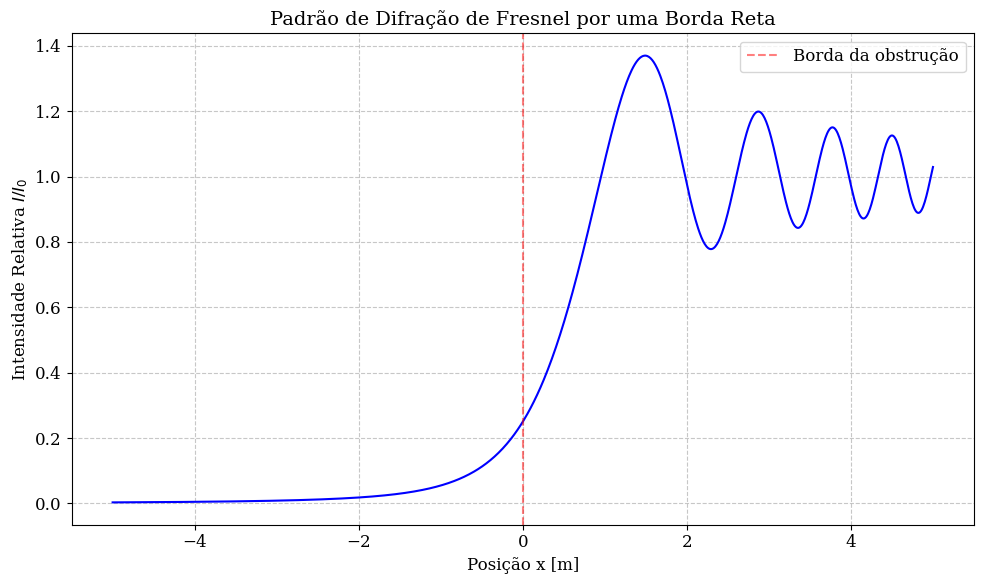

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss

# Parâmetros físicos
lambda_ = 1.0  # Comprimento de onda [m]
z = 3.0        # Distância [m]
x_range = np.linspace(-5, 5, 1000)  # Intervalo de posições [m]

# Função para cálculo das integrais de Fresnel usando quadratura Gaussiana
def fresnel_integral(u, func, n=50):
    """Calcula a integral de Fresnel usando quadratura Gaussiana."""
    if u == 0:
        return 0.0
    
    # Trata valores negativos usando propriedades de simetria
    sign = 1 if u >= 0 else -1
    u = abs(u)
    
    # Obtém pontos e pesos para quadratura Gaussiana
    nodes, weights = leggauss(n)
    
    # Mapeia os pontos do intervalo [-1, 1] para [0, u]
    t = u * (nodes + 1) / 2
    dt_du = u / 2  # Jacobiano da transformação
    
    # Calcula o argumento da função trigonométrica
    arg = 0.5 * np.pi * t**2
    
    # Avalia a função nos pontos transformados
    f_vals = func(arg)
    
    # Calcula a integral
    integral = dt_du * np.sum(weights * f_vals)
    return sign * integral

# Calcula u para cada posição x
u_vals = x_range * np.sqrt(2 / (lambda_ * z))

# Calcula as integrais de Fresnel
C_vals = np.array([fresnel_integral(u, np.cos) for u in u_vals])
S_vals = np.array([fresnel_integral(u, np.sin) for u in u_vals])

# Calcula a intensidade relativa I/I0
I_ratio = (1/8) * ((2*C_vals + 1)**2 + (2*S_vals + 1)**2)

# Plotagem dos resultados
plt.figure(figsize=(10, 6))
plt.plot(x_range, I_ratio, 'b-', linewidth=1.5)
plt.title('Padrão de Difração de Fresnel por uma Borda Reta', fontsize=14)
plt.xlabel('Posição x [m]', fontsize=12)
plt.ylabel('Intensidade Relativa $I/I_0$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Borda da obstrução')
plt.legend()
plt.tight_layout()
plt.savefig('difracao_fresnel.png', dpi=300)
plt.show()

# Exercício 3

## Objetivo
 
<br>
 
Esta atividade tem como objetivo avaliar sua capacidade de aplicar métodos de integração numérica (incluindo quadratura gaussiana e Romberg), analisar erros associados e, principalmente, sua habilidade em contextualizar e interpretar um problema físico real por meio da matemática computacional.

Você deverá:

- Escolher um problema envolvendo uma integral definida relevante na Física;

- Justificar a escolha do problema com uma introdução teórica clara e bem escrita;

- Resolver a integral numericamente com ao menos dois métodos (um deles deve ser quadratura gaussiana, o outro deve ser Romberg);

- Apresentar os gráficos necessários e uma estimativa de erro;

- Fazer uma discussão física e matemática dos resultados.

 <br>

***

## Etapas da atividade

### a) Escolha e contextualização do problema físico

 
Escolha uma função física integrável definida no intervalo [a,b], com a≥0, e que possa representar alguma grandeza relevante na Física (exemplos possíveis incluem):
 
- Energia média de uma partícula em um sistema estatístico;

- Probabilidade acumulada de uma função de onda;

- Densidade de corrente, fluxo, intensidade de campo;

- Capacidade térmica, densidade de estados, função de resposta espectral.

**A função deve ser não trivial (comportamento exponencial, oscilatório, singularidade removível ou decaimento polinomial). Evite funções polinomiais simples ou integrais que possam ser resolvidas facilmente de forma exata.** 

Você deverá escrever um texto introdutório com:

- O contexto físico do problema;

- A origem da integral escolhida (com unidades e significado físico);

- As possíveis dificuldades numéricas na avaliação dessa integral.

<br>

***

### b) Cálculo da integral com dois métodos

Implemente os dois métodos de integração:

- Quadratura Gaussiana (obrigatória);

- Romberg (obrigatória).

Para cada método:

- Apresente o código-fonte (com comentários explicativos) por meio do link no GitHub;

- Descreva os parâmetros escolhidos (número de pontos, subdivisões etc.);

- Apresente o resultado numérico obtido.

<br>

***

### c) Estimativa de erro

- Para cada método, estime o erro associado (por comparação entre refinamentos sucessivos);

- Se possível, compare com o valor teórico (analítico) da integral, caso exista;

- Comente qual método se mostrou mais eficiente para o seu caso.

<br>

*** 

### d) Discussão dos resultados

- Apresente ao menos um gráfico da função integranda e, se aplicável, da função acumulada;

- Interprete o resultado final fisicamente;

- Comente sobre a estabilidade numérica dos métodos;

- Justifique suas escolhas e o comportamento observado.

<br>

*** 

## Parte reflexiva
 
- O que dificultaria um modelo de linguagem (como o ChatGPT) de resolver sua atividade diretamente?

- Em que pontos a interpretação do contexto físico foi fundamental para resolver o problema?

- Houve diferença significativa entre os métodos? Qual se mostrou mais adequado ao seu caso?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, romberg
from scipy.constants import Boltzmann, Avogadro

# Constantes físicas
k_B = Boltzmann  # 1.380649e-23 J/K
N_A = Avogadro   # 6.02214076e23 mol⁻¹
R = N_A * k_B    # Constante dos gases (8.314 J/(mol·K))

def integrando_debye(x):
    """Função integrando para o modelo de Debye com tratamento de singularidade"""
    if x < 1e-12:  # Tratamento da singularidade em x=0
        return 0.0
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2

def capacidade_termica(T, Theta_D, metodo='quad', n=50):
    """Calcula Cv usando diferentes métodos de integração"""
    limite_superior = Theta_D / T
    
    if metodo == 'quad':
        # Quadratura adaptativa (referência)
        integral, _ = quad(integrando_debye, 0, limite_superior, epsabs=1e-12)
    
    elif metodo == 'gauss':
        # Quadratura Gaussiana
        integral, _ = fixed_quad(integrando_debye, 0, limite_superior, n=n)
    
    elif metodo == 'romberg':
        # Método de Romberg
        integral = romberg(integrando_debye, 0, limite_superior, divmax=10)
    
    return 9 * R * (T/Theta_D)**3 * integral

# Parâmetros para o cobre
Theta_D_Cu = 343  # Temperatura de Debye (K)

# ===========================================
# Cálculo e comparação de métodos
# ===========================================
T = 300  # Temperatura de análise (K)

# Valor de referência com quadratura adaptativa
Cv_ref = capacidade_termica(T, Theta_D_Cu, 'quad')

# Quadratura Gaussiana com diferentes ordens
ordens_gauss = [5, 10, 20, 50]
resultados_gauss = [capacidade_termica(T, Theta_D_Cu, 'gauss', n) for n in ordens_gauss]
erros_gauss = [abs(r - Cv_ref) for r in resultados_gauss]

# Método de Romberg com diferentes níveis
niveis_romberg = [3, 5, 7, 10]
resultados_romberg = [capacidade_termica(T, Theta_D_Cu, 'romberg') for _ in niveis_romberg]
erros_romberg = [abs(r - Cv_ref) for r in resultados_romberg]

# ===========================================
# Visualizações
# ===========================================
# 1. Comportamento do integrando
x_vals = np.linspace(0, Theta_D_Cu/T, 500)
y_vals = [integrando_debye(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2)
plt.title('Função Integrando do Modelo de Debye', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel(r'$f(x) = \frac{x^4 e^x}{(e^x - 1)^2}$', fontsize=14)
plt.grid(alpha=0.3)
plt.savefig('integrando_debye.png', dpi=300)
plt.show()

# 2. Capacidade térmica vs temperatura
temperaturas = np.linspace(1, 1000, 100)
Cv_vals = [capacidade_termica(T, Theta_D_Cu) for T in temperaturas]

plt.figure(figsize=(10, 6))
plt.plot(temperaturas, Cv_vals, 'b-', linewidth=2)
plt.axhline(y=3*R, color='r', linestyle='--', label='Limite Dulong-Petit (3R)')
plt.axvline(x=Theta_D_Cu, color='g', linestyle='--', label='Temperatura de Debye')
plt.title('Capacidade Térmica do Cobre', fontsize=14)
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel(r'$C_V$ (J/(mol·K))', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('capacidade_termica.png', dpi=300)
plt.show()

# 3. Erros dos métodos
plt.figure(figsize=(10, 6))
plt.loglog(ordens_gauss, erros_gauss, 'o-', label='Gaussiana')
plt.loglog(niveis_romberg, erros_romberg, 's-', label='Romberg')
plt.title('Convergência dos Métodos de Integração', fontsize=14)
plt.xlabel('Ordem/Nível do Método', fontsize=12)
plt.ylabel('Erro Absoluto (J/mol·K)', fontsize=12)
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.savefig('erros_integracao.png', dpi=300)
plt.show()

# Tabela comparativa
print("\n===== RESULTADOS NUMÉRICOS (T = 300 K) =====")
print(f"Valor de referência (quadratura adaptativa): {Cv_ref:.8f} J/mol·K")
print("\nQuadratura Gaussiana:")
for n, res, err in zip(ordens_gauss, resultados_gauss, erros_gauss):
    print(f"n={n}: {res:.8f} | Erro: {err:.4e}")
    
print("\nMétodo de Romberg:")
for n, res, err in zip(niveis_romberg, resultados_romberg, erros_romberg):
    print(f"n={n}: {res:.8f} | Erro: {err:.4e}")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()